In [10]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [11]:
import numpy as np

train_scaled, test_scaled = train_input/255.0, test_input/255.0
input = np.concatenate((train_scaled, test_scaled))
target = np.concatenate((train_target, test_target))

train_input, test_input, train_target, test_target = train_test_split(input, target, test_size=0.2)

In [12]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [13]:
model = model_fn()
model.summary()

c:\Users\dlwns\Desktop\Study\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_input, train_target, epochs=5, verbose=0)

In [15]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


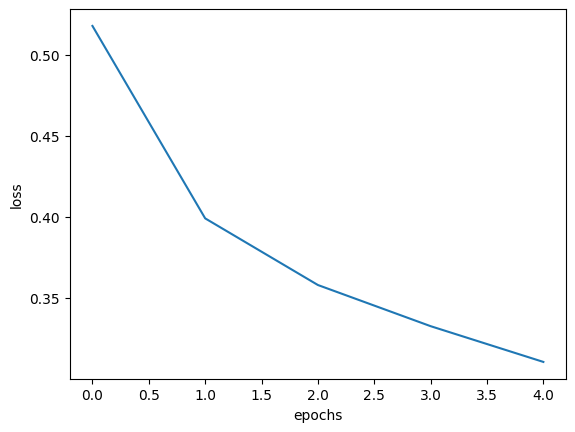

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

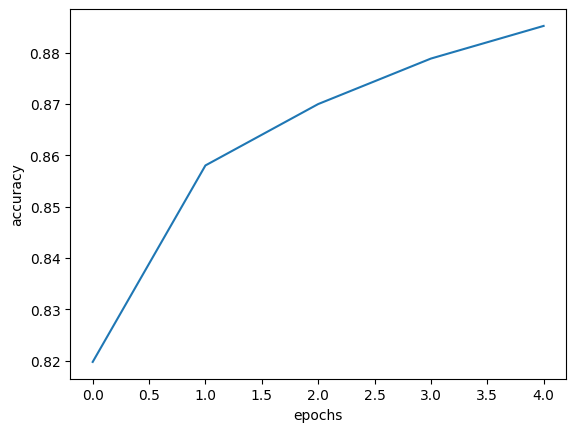

In [17]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


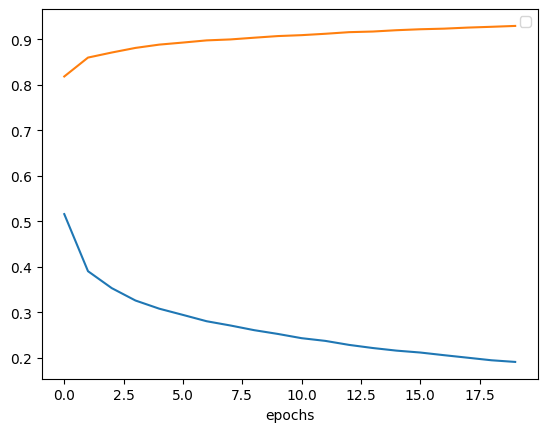

In [18]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_input, train_target, verbose=0, epochs=20)
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.legend()
plt.show()

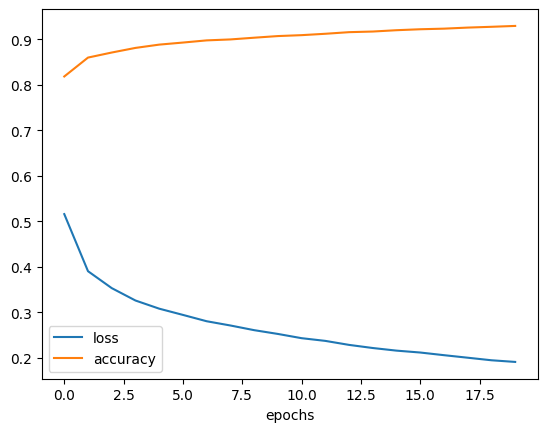

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.legend(['loss', 'accuracy'])
plt.show()

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_input, train_target, epochs=20, validation_data=(test_input, test_target))

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.9292 - loss: 0.1891 - val_accuracy: 0.8883 - val_loss: 0.3466
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.9352 - loss: 0.1741 - val_accuracy: 0.8914 - val_loss: 0.3446
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - accuracy: 0.9339 - loss: 0.1746 - val_accuracy: 0.8878 - val_loss: 0.3682
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.9361 - loss: 0.1709 - val_accuracy: 0.8926 - val_loss: 0.3517
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.9375 - loss: 0.1666 - val_accuracy: 0.8926 - val_loss: 0.3461
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.9438 - loss: 0.1578 - val_accuracy: 0.8934 - val_loss: 0.3556
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - accuracy: 0.9372 - loss: 0.1637 - val_accuracy: 0.8929 - val_loss: 0.3498
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.9430 -

In [21]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


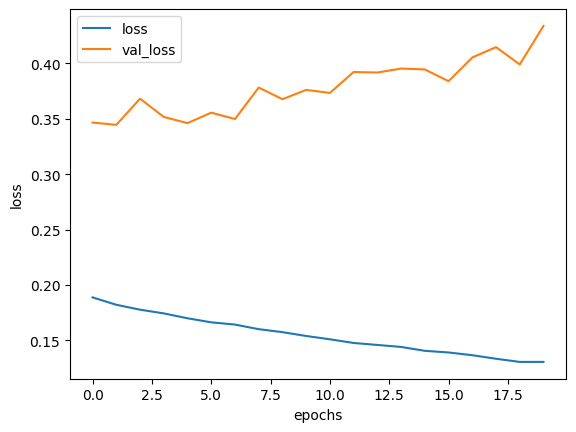

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.9549 - loss: 0.1230 - val_accuracy: 0.8903 - val_loss: 0.4630
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.9550 - loss: 0.1221 - val_accuracy: 0.8903 - val_loss: 0.4625
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.9555 - loss: 0.1209 - val_accuracy: 0.8882 - val_loss: 0.4926
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.9579 - loss: 0.1159 - val_accuracy: 0.8924 - val_loss: 0.5096
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.9566 - loss: 0.1173 - val_accuracy: 0.8924 - val_loss: 0.4978
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.9578 - loss: 0.1168 - val_accuracy: 0.8899 - val_loss: 0.5277
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.9598 - loss: 0.1161 - val_accuracy: 0.8866 - val_loss: 0.5356
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.9576 -

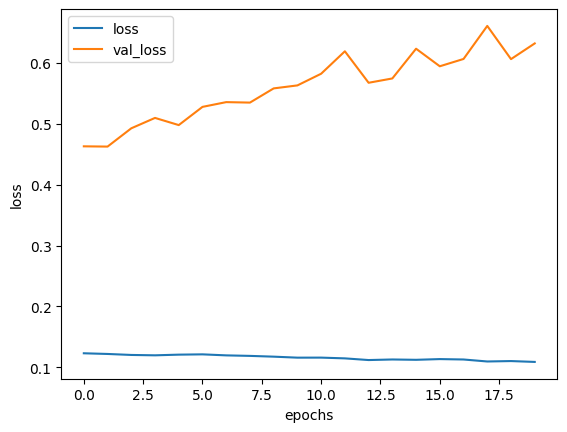

In [23]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_input, train_target, epochs=20, validation_data=(test_input, test_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

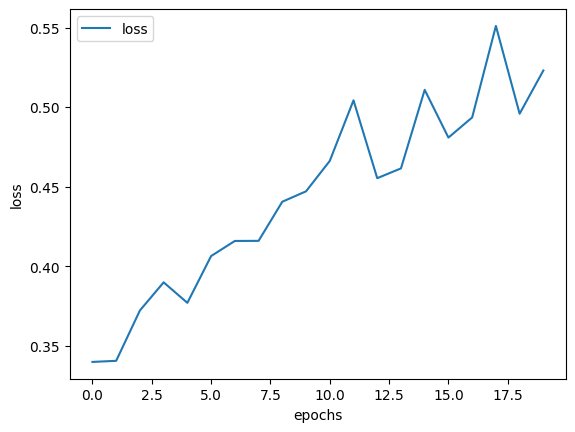

In [24]:
plt.plot([v-t for t, v in zip(history.history['loss'], history.history['val_loss'])])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 956us/step - accuracy: 0.7323 - loss: 0.7626 - val_accuracy: 0.8521 - val_loss: 0.4145
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.8360 - loss: 0.4532 - val_accuracy: 0.8669 - val_loss: 0.3712
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8518 - loss: 0.4080 - val_accuracy: 0.8659 - val_loss: 0.3696
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.8574 - loss: 0.3877 - val_accuracy: 0.8794 - val_loss: 0.3422
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.8667 - loss: 0.3628 - val_accuracy: 0.8732 - val_loss: 0.3514
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.8702 - loss: 0.3559 - val_accuracy: 0.8764 - val_loss: 0.3455
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8739 - loss: 0.3471 - val_accuracy: 0.8782 - val_loss: 0.3410
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.8772 -

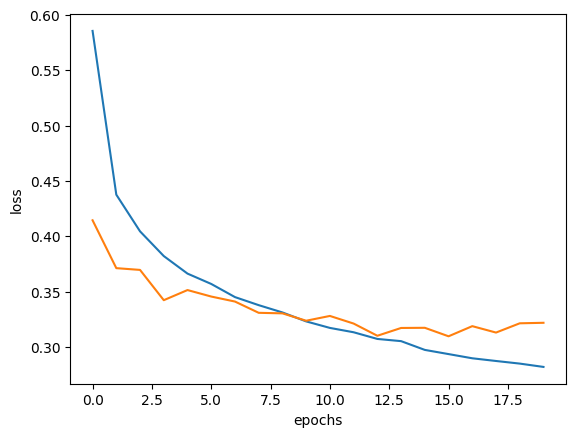

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_input, train_target, epochs=20, validation_data=(test_input, test_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_input, train_target, epochs=10, validation_data=(test_input, test_target))

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.7409 - loss: 0.7447 - val_accuracy: 0.8504 - val_loss: 0.4165
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8386 - loss: 0.4443 - val_accuracy: 0.8664 - val_loss: 0.3768
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.8519 - loss: 0.4054 - val_accuracy: 0.8684 - val_loss: 0.3602
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.8588 - loss: 0.3828 - val_accuracy: 0.8698 - val_loss: 0.3523
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.8625 - loss: 0.3677 - val_accuracy: 0.8701 - val_loss: 0.3431
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.8706 - loss: 0.3531 - val_accuracy: 0.8740 - val_loss: 0.3383
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.8753 - loss: 0.3463 - val_accuracy: 0.8791 - val_loss: 0.3281
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8740 -

In [28]:
model.save_weights('model.weights.h5')

In [29]:
model.save('model-whole.keras')

In [30]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [31]:
import numpy as np
val_labels = np.argmax(model.predict(test_input), axis=1)
print(np.mean(test_target == val_labels))

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step
0.8832142857142857


In [32]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(test_input, test_target)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8956 - loss: 0.2826


[0.2770971953868866, 0.895642876625061]

In [33]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', 
                                                save_best_only=True)
model.fit(train_input, train_target, epochs=20, validation_data=(test_input, test_target), callbacks=[checkpoint_cb])

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.7420 - loss: 0.7343 - val_accuracy: 0.8457 - val_loss: 0.4288
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.8431 - loss: 0.4384 - val_accuracy: 0.8581 - val_loss: 0.3826
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.8550 - loss: 0.4009 - val_accuracy: 0.8708 - val_loss: 0.3589
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.8586 - loss: 0.3830 - val_accuracy: 0.8677 - val_loss: 0.3578
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.8680 - loss: 0.3622 - val_accuracy: 0.8762 - val_loss: 0.3376
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.8710 - loss: 0.3514 - val_accuracy: 0.8754 - val_loss: 0.3371
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.8727 - loss: 0.3458 - val_accuracy: 0.8672 - val_loss: 0.3592
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.8763 -

In [34]:
model = keras.models.load_model('best-model.keras')
model.evaluate(test_input, test_target)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8844 - loss: 0.3214


[0.31276747584342957, 0.8876428604125977]

In [35]:
import matplotlib.pyplot as plt
import numpy as np

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, 
                    validation_data=(test_input, test_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7369 - loss: 0.7489 - val_accuracy: 0.8545 - val_loss: 0.4159
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.8415 - loss: 0.4437 - val_accuracy: 0.8554 - val_loss: 0.3848
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.8546 - loss: 0.4032 - val_accuracy: 0.8641 - val_loss: 0.3683
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8594 - loss: 0.3882 - val_accuracy: 0.8735 - val_loss: 0.3436
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - accuracy: 0.8667 - loss: 0.3637 - val_accuracy: 0.8752 - val_loss: 0.3397
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.8692 - loss: 0.3574 - val_accuracy: 0.8805 - val_loss: 0.3306
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8713 - loss: 0.3487 - val_accuracy: 0.8798 - val_loss: 0.3287
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.8782 - l

In [36]:
print(early_stopping_cb.stopped_epoch)

8


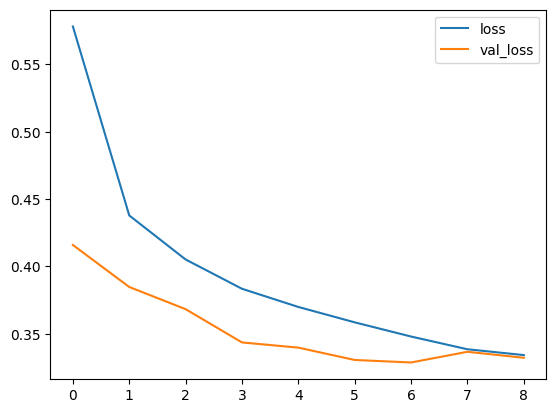

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [38]:
model.evaluate(test_input, test_target)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.8764 - loss: 0.3388


[0.32872796058654785, 0.8797857165336609]